In [1]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
matplotlib.rcParams.update({'font.size': 22, 'figure.figsize': (40, 8), 'font.family': 'serif', 'text.usetex': True, 'pgf.rcfonts': False})

%load_ext autoreload
%autoreload 2

sys.path.append('..')
import util
import Densities as de
import MultiIndex as mi
import Surrogates as su
import Transport as tm

# Polynomial surrogate $f_{\tilde \pi}$ and transport-based samples of a multimodal Gaussian density $f_\pi$

In [2]:
t_1d = de.MultimodalDensity(
    densities = [de.Gaussian(mean=np.array([[-.6]]), cova=np.array([[.005]])),
                 de.Gaussian(mean=np.array([[.7]]), cova=np.array([[.4]]))])
m_1d = mi.TotalDegreeSet(dim=1, order=15)
s_1d = su.Legendre(multis=m_1d, target=t_1d, dist='cheby')
r_1d = tm.TransportMap(s_1d)

In [3]:
p_uni_1d, p_tar_1d = r_1d.samples(1000)

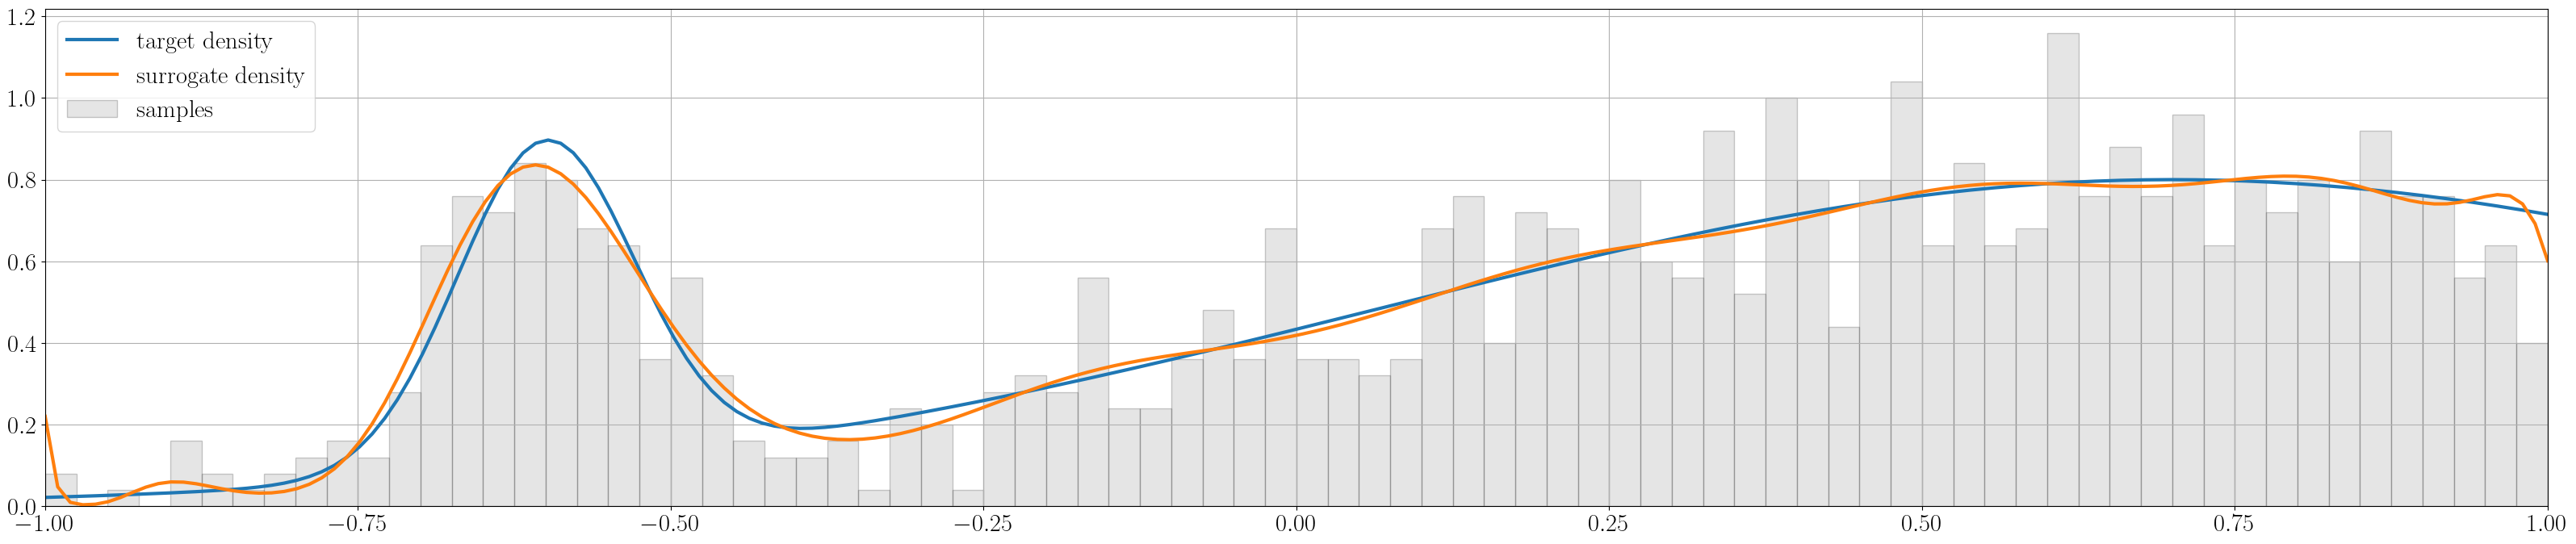

In [4]:
x = np.linspace(-1,1,200)
plt.plot(x, t_1d.evalNrmd(x), lw=3, label='target density')
plt.plot(x, s_1d.evalNrmd(x), lw=3, label='surrogate density')
plt.hist(p_tar_1d[0], bins=80, range=(-1,1), color='grey', ec='k', alpha=.2, label='samples', density=True)
plt.legend(); plt.xlim([-1,1]); plt.grid()

# Verifying ${\rm det d}S(x) = f_\pi(x)$

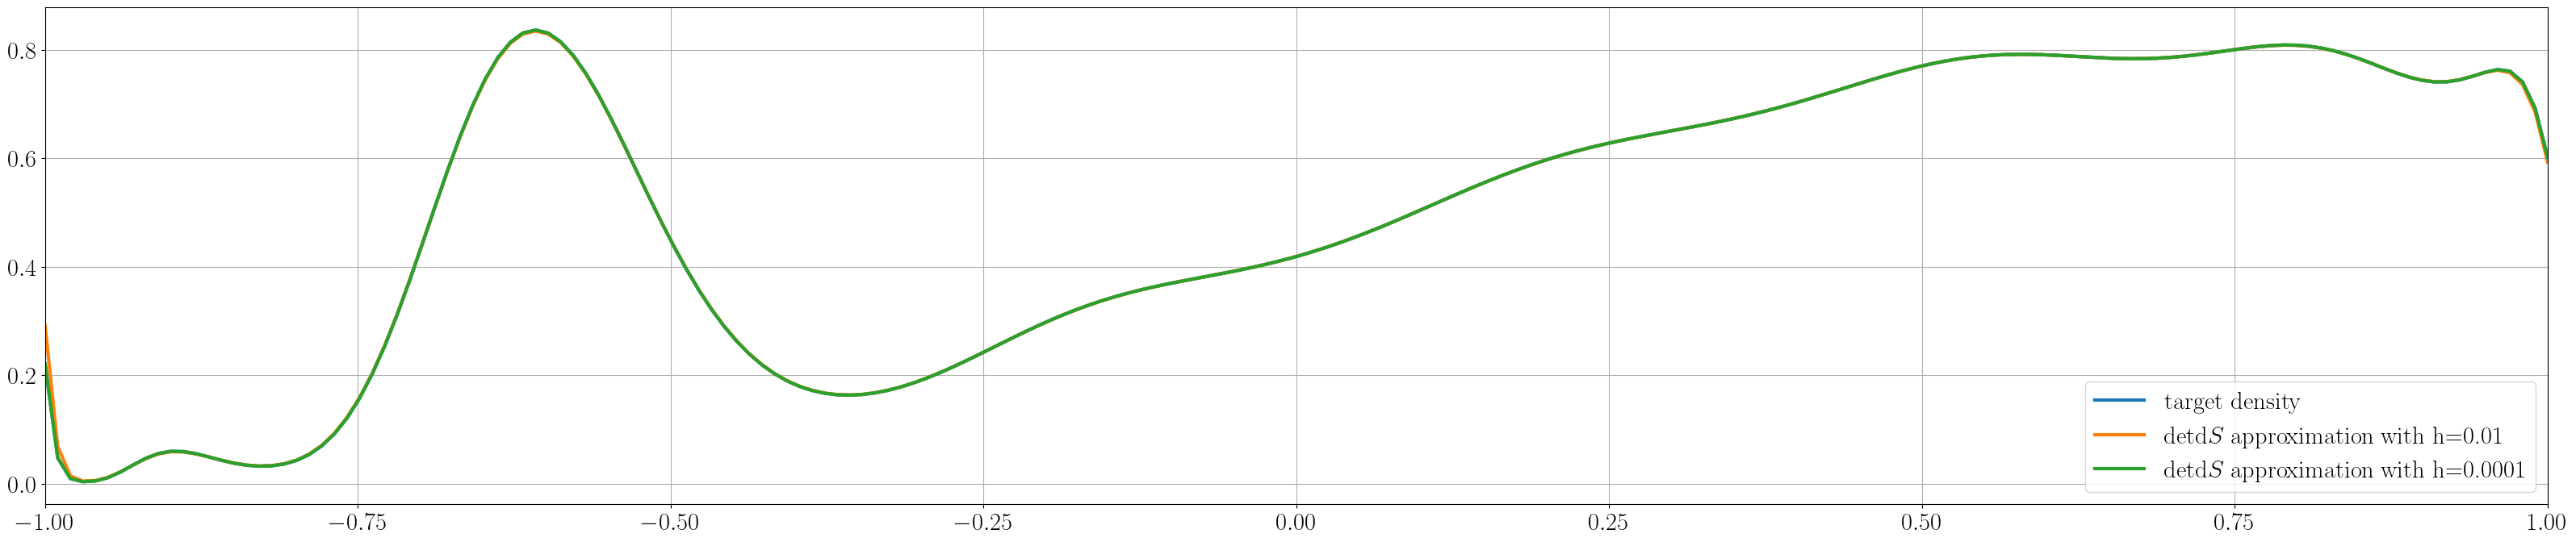

In [5]:
hs = [.01, .0001]
detS = np.zeros((len(hs), len(x)))
for i in range(len(hs)) :
    for j in range(len(x)) :
        detS[i,j] = np.prod((r_1d.eval(x[j]+hs[i]) - r_1d.eval(x[j]-hs[i])) / (2*hs[i]) / 2)

plt.plot(x, s_1d.evalNrmd(x), lw=3, label='target density')
for i in range(len(hs)) :
    plt.plot(x, detS[i], lw=3, label=f'detd$S$ approximation with h={hs[i]}')
plt.legend(); plt.xlim([-1,1]); plt.grid()